In [1]:
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt, operator as op
import glob
from pathlib import Path
import seaborn as sns
from collections import defaultdict
import pandas as pd


In [2]:
base_path = Path("/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/")
outputs = Path("/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/outputs/")
conditions = ["repodrprRNAi40-42D","repodrprRNAi_RelishRNAi"]
meshfiles = dict()
for condition in conditions:
    inputs = glob.glob(str(base_path.joinpath(condition))+"*")
    meshfiles[condition] = inputs

In [3]:
%%capture --no-display
vacuole_metrics = defaultdict(dict)

for condition in meshfiles.keys():
    for brain in meshfiles[condition]: 
        whole_brain = mesh.Mesh.from_file(glob.glob(str(brain)+"/wholebrain/*.stl")[0])
        vacuoles = glob.glob(str(brain)+"/vacuoles/*.stl")
        
        whole_brain_volume =  whole_brain.get_mass_properties()[0]
        
        vacuole_volumes = list()
        for meshfile in vacuoles:
            vacuole = mesh.Mesh.from_file(meshfile)
            volume, cog, inertia = vacuole.get_mass_properties()
            vacuole_volumes.append(volume)
        
        percent_vacuole_volume_per_brain = 100*sum(vacuole_volumes)/whole_brain_volume
        vacuole_metrics[brain.split("/")[-1]] = {"condition": condition,
                                                 "num_vacuoles":len(vacuole_volumes),
                                                 "percent_vacuole_volume": percent_vacuole_volume_per_brain,
                                                 "vacuole_volumes": vacuole_volumes,
                                                 "vacuole_volumes_brain_normalized": vacuole_volumes/whole_brain_volume,
                                                 "whole_brain_volume": whole_brain_volume
                                                }
        
        


In [4]:
#print(vacuole_metrics)
vacuole_metrics_df = pd.DataFrame.from_dict(vacuole_metrics)
vacuole_metrics_df_t = vacuole_metrics_df.transpose()
vacuole_metrics_df_t['sample'] = vacuole_metrics_df_t.index
vacuole_metrics_df_t

,condition,num_vacuoles,percent_vacuole_volume,vacuole_volumes,vacuole_volumes_brain_normalized,whole_brain_volume,sample
repodrprRNAi40-42D_female_phalloidin_DAPI_6.9_20230612-002-RGB,repodrprRNAi40-42D,22,0.592972,"[569160127829.3334, 81609468586.66667, 3833013...","[0.00015368431725029097, 2.2036145625193494e-0...",3703436616127829.5,repodrprRNAi40-42D_female_phalloidin_DAPI_6.9_...
repodrprRNAi40-42D_male_phalloidin_DAPI_6.9_20230612-001-RGB,repodrprRNAi40-42D,13,0.409651,"[861144787626.6666, 2249659361962.6665, 110393...","[0.00012321027495259296, 0.0003218751974345826...",6989228682088448.0,repodrprRNAi40-42D_male_phalloidin_DAPI_6.9_20...
repodrprRNAi40-42D_female_phalloidin_DAPI_6.9_20230612-003-RGB,repodrprRNAi40-42D,22,0.448699,"[326964254037.3333, 943511371776.0, 4570137559...","[5.225249479492325e-05, 0.00015078352582556957...",6257390299172864.0,repodrprRNAi40-42D_female_phalloidin_DAPI_6.9_...
repodrprRNAi40-42D_female_phalloidin_DAPI_6.9_20230612-001-RGB,repodrprRNAi40-42D,21,0.201414,"[1110416512341.3333, 475967608149.3333, 548099...","[0.00018371333806255406, 7.874666589601729e-05...",6044289021427712.0,repodrprRNAi40-42D_female_phalloidin_DAPI_6.9_...
repodrprRNAi40-42D_male_phalloidin_DAPI_6.9_20230612-002-RGB,repodrprRNAi40-42D,29,0.880482,"[981420867584.0, 7755535253504.0, 162429309201...","[0.00015195778911444112, 0.0012008242635218934...",6458509782903467.0,repodrprRNAi40-42D_male_phalloidin_DAPI_6.9_20...
repodrprRNAi_RelishRNAi40D_male_phalloidin_Hoechst_6.15_20230617-001-RGB,repodrprRNAi_RelishRNAi,14,0.827406,"[349604424362.6667, 564948697088.0, 1597440109...","[4.901657146160608e-05, 7.920908962590446e-05,...",7132372051694933.0,repodrprRNAi_RelishRNAi40D_male_phalloidin_Hoe...
repodrprRNAi_RelishRNAi40D_male_phalloidin_Hoechst_6.15_20230617-003-RGB,repodrprRNAi_RelishRNAi,17,0.298103,"[313274859520.0, 1412635688960.0, 535991549952...","[5.3851672454689964e-05, 0.0002428308308436815...",5817365464064000.0,repodrprRNAi_RelishRNAi40D_male_phalloidin_Hoe...
repodrprRNAi_RelishRNAi40D_male_phalloidin_Hoechst_6.15_20230617-002-RGB,repodrprRNAi_RelishRNAi,22,0.492653,"[3548169590101.3335, 722376130560.0, 533359798...","[0.0005884000388683798, 0.0001197930742895958,...",6030199448873643.0,repodrprRNAi_RelishRNAi40D_male_phalloidin_Hoe...
repodrprRNAi_RelishRNAi40D_female_phalloidin_DAPI_6.13_20230616-002-RGB,repodrprRNAi_RelishRNAi,8,0.188319,"[686573005482.6666, 400675569664.0, 7755530895...","[0.00013883337615788025, 8.102145239649892e-05...",4945302235551061.0,repodrprRNAi_RelishRNAi40D_female_phalloidin_D...
repodrprRNAi_RelishRNAi_40Dmale_phalloidin_Hoechst_6.15_20230617-002-RGB,repodrprRNAi_RelishRNAi,22,0.492653,"[3548169590101.3335, 722376130560.0, 533359798...","[0.0005884000388683798, 0.0001197930742895958,...",6030199448873643.0,repodrprRNAi_RelishRNAi_40Dmale_phalloidin_Hoe...


/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_49910/2531295143.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})


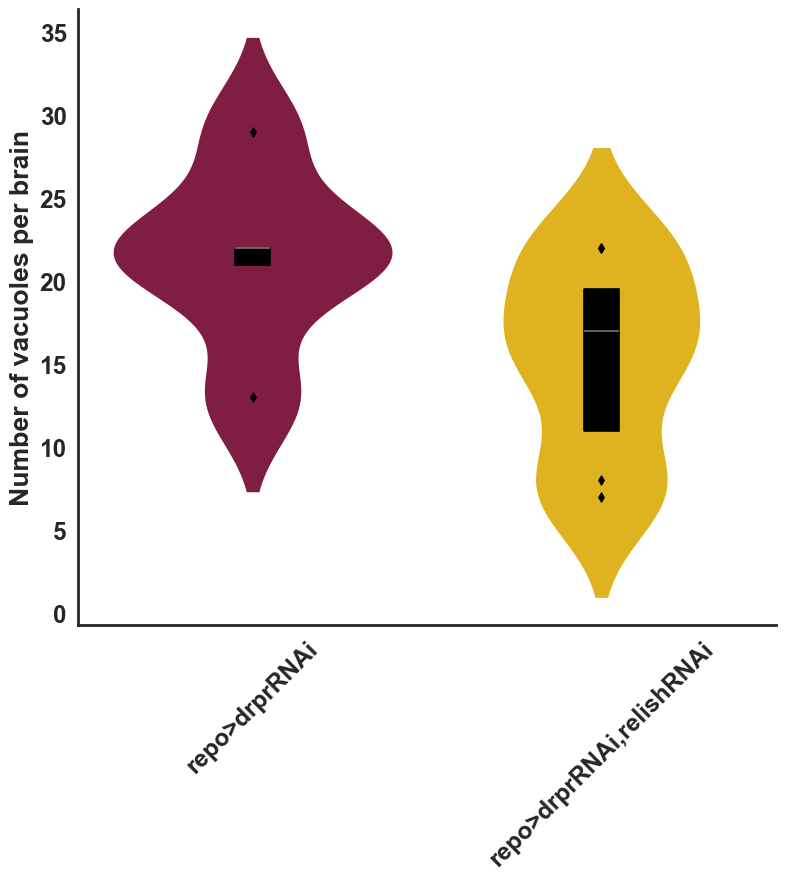

In [20]:
color_scheme = {"repodrprRNAi40-42D": "#900C3F","repodrprRNAi_RelishRNAi":"#FFC300" }
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

fig, ax = plt.subplots(figsize=(9, 8))
sns.violinplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
               x= vacuole_metrics_df_t["condition"],  inner=None,
               palette = color_scheme, linewidth = 0, aspect=5, ax = ax, bw = 0.5
          )

sns.boxenplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
               x= vacuole_metrics_df_t["condition"], color="black", width=0.1, ax = ax, 
             line_kws={"color":"white"})

sns.despine(right = True)
ax.set_xticklabels(['repo>drprRNAi', 'repo>drprRNAi,relishRNAi'], rotation=45,                       
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("Number of vacuoles per brain",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig.savefig(outputs.joinpath("num_vacuoles_violin.pdf"), bbox_inches='tight') 

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_49910/759113308.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})


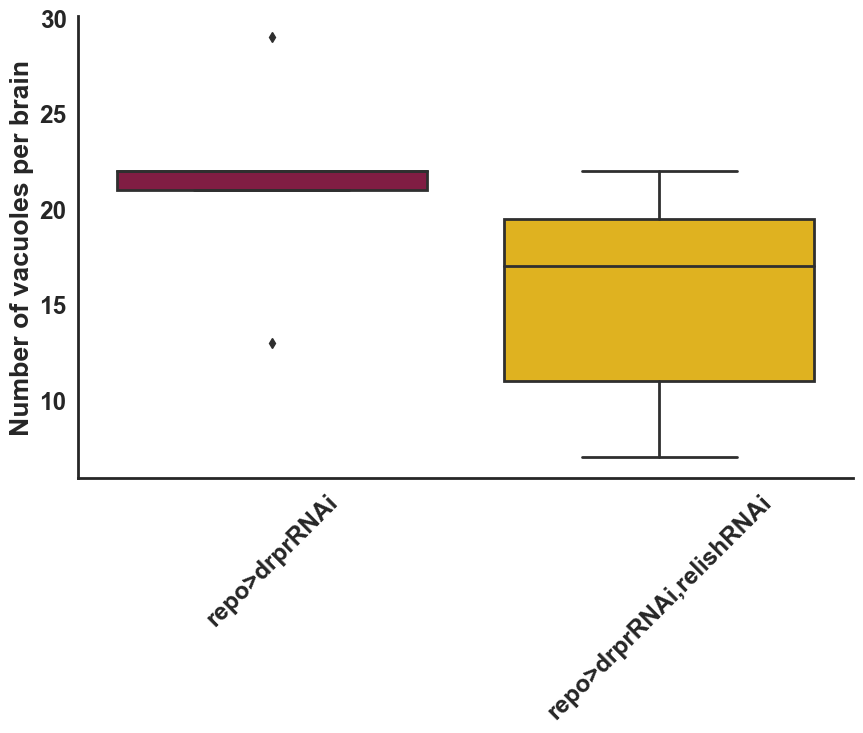

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
               x= vacuole_metrics_df_t["condition"],  
               palette = color_scheme, linewidth = 2,  ax = ax
          )

sns.despine(right = True)
ax.set_xticklabels(['repo>drprRNAi', 'repo>drprRNAi,relishRNAi'], rotation=45,
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("Number of vacuoles per brain",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig.savefig(outputs.joinpath("num_vacuoles_box.pdf"), bbox_inches='tight') 

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_49910/1681039178.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})


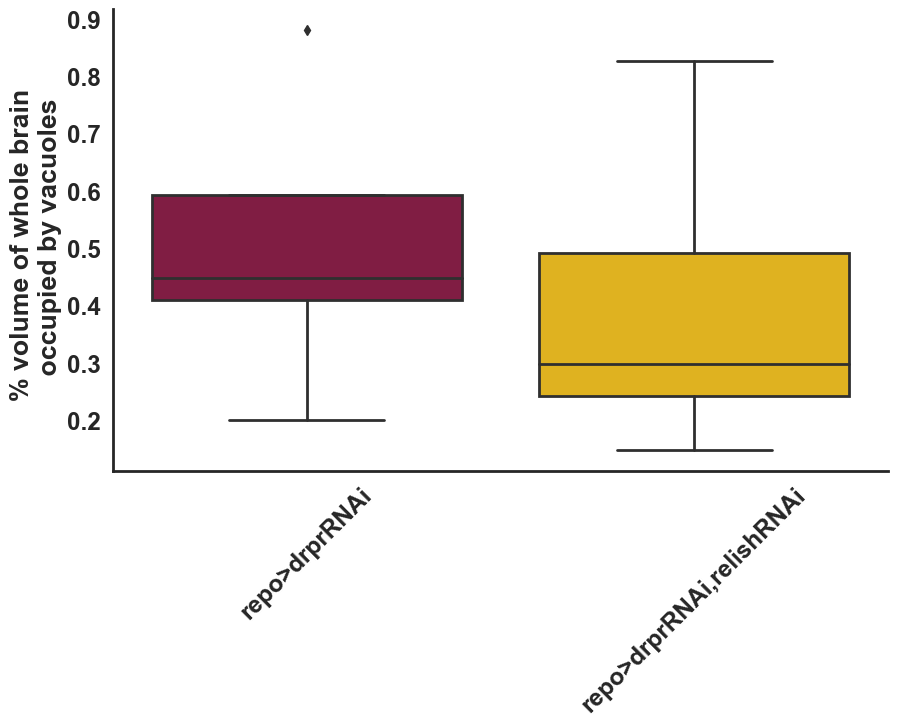

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y= vacuole_metrics_df_t["percent_vacuole_volume"].astype(float),
               x= vacuole_metrics_df_t["condition"], linewidth = 2,
               palette = color_scheme, ax = ax
          )

sns.despine(right = True)
ax.set_xticklabels(['repo>drprRNAi', 'repo>drprRNAi,relishRNAi'], rotation=45,
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("% volume of whole brain \n occupied by vacuoles",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig.savefig(outputs.joinpath("percent_vacuoles_box.pdf"), bbox_inches='tight') 



/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_49910/2966843397.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})


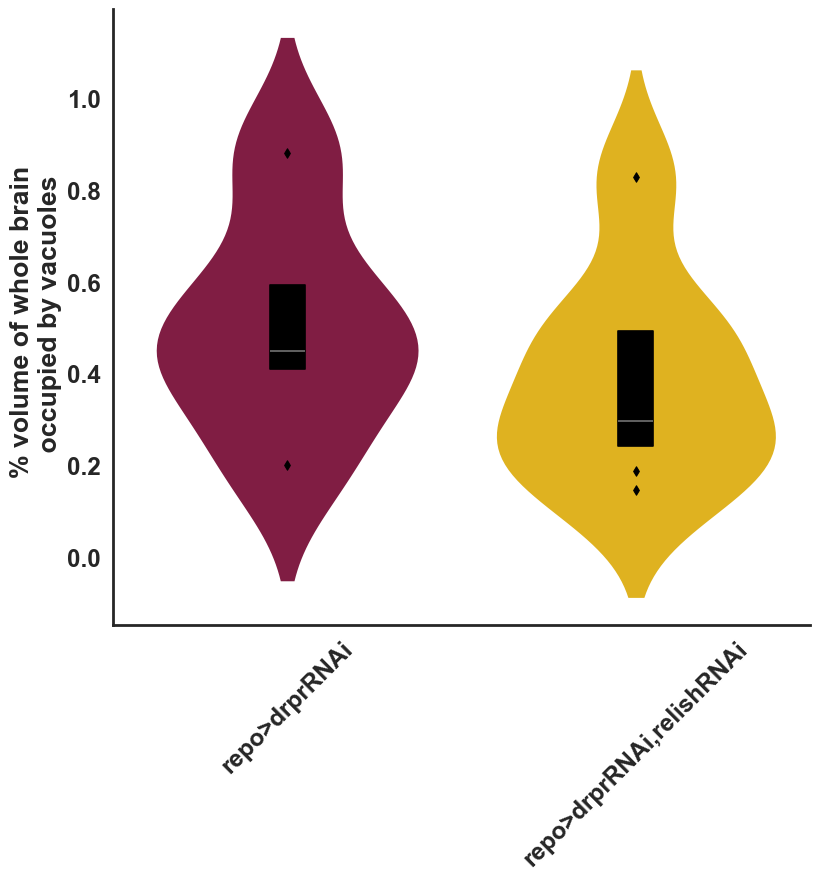

In [19]:
fig, ax = plt.subplots(figsize=(9,8))
sns.violinplot(y= vacuole_metrics_df_t["percent_vacuole_volume"].astype(float),
               x= vacuole_metrics_df_t["condition"],  inner=None,
               palette = color_scheme, linewidth = 0, aspect=5, ax = ax, bw=0.5
          )

sns.boxenplot(y= vacuole_metrics_df_t["percent_vacuole_volume"].astype(float),
               x= vacuole_metrics_df_t["condition"], color="black", width=0.1, ax = ax, 
             line_kws={"color":"white"})
sns.despine(right = True)
ax.set_xticklabels(['repo>drprRNAi', 'repo>drprRNAi,relishRNAi'], rotation=45,
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("% volume of whole brain \n occupied by vacuoles",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig.savefig(outputs.joinpath("percent_vacuoles_violin.pdf"), bbox_inches='tight') 

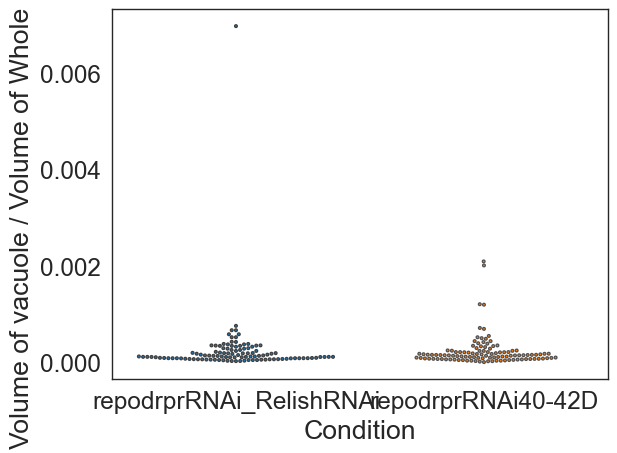

<Figure size 640x480 with 0 Axes>

In [9]:
vacuoles_per_condition = defaultdict(list)
for brain in vacuole_metrics.values():
    vacuoles_per_condition[brain["condition"]].append(brain["vacuole_volumes_brain_normalized"])
    
vacuoles_per_condition_unlisted = defaultdict(list)
for volumes in vacuoles_per_condition.keys():
    flat_list = [item for sublist in vacuoles_per_condition[volumes] for item in sublist]
    vacuoles_per_condition_unlisted[volumes] = flat_list

sorted_keys, sorted_vals = zip(*sorted(vacuoles_per_condition_unlisted.items(), key=op.itemgetter(1)))


sns.swarmplot(data=sorted_vals, size=2, linewidth=.9)

plt.xticks(plt.xticks()[0], sorted_keys)
plt.xlabel("Condition")
plt.ylabel("Volume of vacuole / Volume of Whole brain")
plt.show()

sns.despine(right = True)



In [24]:
vacuole_metrics_df_t_conditionindex = vacuole_metrics_df_t[["condition","num_vacuoles"]].set_index("condition")
vacuole_metrics_df_t_conditionindex

,num_vacuoles
condition,
repodrprRNAi40-42D,22
repodrprRNAi40-42D,13
repodrprRNAi40-42D,22
repodrprRNAi40-42D,21
repodrprRNAi40-42D,29
repodrprRNAi_RelishRNAi,14
repodrprRNAi_RelishRNAi,17
repodrprRNAi_RelishRNAi,22
repodrprRNAi_RelishRNAi,8


In [25]:
repo_drpr = vacuole_metrics_df_t_conditionindex["num_vacuoles"].loc["repodrprRNAi40-42D"].to_list()
repo_drpr_relish = vacuole_metrics_df_t_conditionindex["num_vacuoles"].loc["repodrprRNAi_RelishRNAi"].to_list()

In [30]:
from scipy import stats 
import numpy as np
print(np.median(repo_drpr),np.median(repo_drpr_relish))
print("mean number of vacuoles in repo>drprRNAi: ",np.mean(repo_drpr))
print("mean number of vacuoles in repo>drprRNAi,relishRNAi: ",np.mean(repo_drpr_relish))
print("difference in means :",np.mean(repo_drpr)-np.mean(repo_drpr_relish))
stats.ttest_ind(repo_drpr,repo_drpr_relish,alternative="greater")

22.0 17.0
mean number of vacuoles in repo>drprRNAi:  21.4
mean number of vacuoles in repo>drprRNAi,relishRNAi:  15.285714285714286
difference in means : 6.114285714285712


Ttest_indResult(statistic=1.7685104891913188, pvalue=0.05370582942484685)

In [34]:
vacuole_metrics_df_t_conditionindex_percentvacuole = vacuole_metrics_df_t[["condition","percent_vacuole_volume"]].set_index("condition")
repo_drpr = vacuole_metrics_df_t_conditionindex_percentvacuole["percent_vacuole_volume"].loc["repodrprRNAi40-42D"].to_list()
repo_drpr_relish = vacuole_metrics_df_t_conditionindex_percentvacuole["percent_vacuole_volume"].loc["repodrprRNAi_RelishRNAi"].to_list()
print("mean %vacuole volume in repo>drprRNAi: ",np.mean(repo_drpr))
print("mean %vacuole volume in repo>drprRNAi,relishRNAi: ",np.mean(repo_drpr_relish))
print("difference in means :",np.mean(repo_drpr)-np.mean(repo_drpr_relish))
stats.ttest_ind(repo_drpr,repo_drpr_relish)

stats.ttest_ind(repo_drpr,repo_drpr_relish,alternative="greater")



mean %vacuole volume in repo>drprRNAi:  0.5066435035220288
mean %vacuole volume in repo>drprRNAi,relishRNAi:  0.39213804639905186
difference in means : 0.11450545712297694


Ttest_indResult(statistic=0.8107649165382009, pvalue=0.21818563209791064)